In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #para clasificar los datos
import sklearn as sk #para normalizar los datos
import seaborn as sns
from sklearn import tree

In [120]:
path1= 'C:/Users/alejandro/Desktop/ProyectoFinal Delfin/Limpiados/viviendas_2015_clusters.csv'
df_Vivienda=pd.read_csv(path1,low_memory=False,index_col=0)

In [121]:
df_Vivienda.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun,Cluster
0,5,2,1,1,1,1,1,4,1,1,1,1,3
1,1,3,1,1,1,1,1,7,1,1,1,1,3
2,3,3,1,1,1,1,1,8,1,1,1,1,3
3,4,3,1,1,1,1,1,5,1,1,1,1,3
4,5,3,1,1,1,1,1,6,1,1,1,1,3


In [122]:
df_copy=df_Vivienda.copy()

In [123]:
df_Vivienda.drop('Cluster_km', axis=1, inplace=True)
df_Vivienda.drop('Cluster_birch', axis=1, inplace=True)

In [124]:
df_copy = sk.preprocessing.normalize(df_copy)

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_copy)
df_vivienda_copy=pca.transform(df_copy)

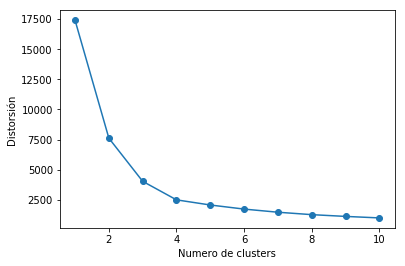

In [112]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                random_state=0)
    km.fit(df_vivienda_copy)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [126]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            random_state=0)
print(np.unique(km.fit_predict(df_vivienda_copy)))
y_km = km.fit_predict(df_vivienda_copy)
y_km

[0 1 2 3]


array([1, 1, 1, ..., 1, 1, 0])

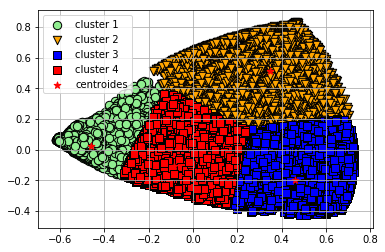

In [127]:
plt.scatter(df_vivienda_copy[y_km==0,0],
          df_vivienda_copy[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_vivienda_copy[y_km==1,0],
          df_vivienda_copy[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_vivienda_copy[y_km==2,0],
          df_vivienda_copy[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(df_vivienda_copy[y_km==3,0],
          df_vivienda_copy[y_km==3,1],
          s=70,
          c='red',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(km.cluster_centers_[:,0],
          km.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

In [128]:
df_Vivienda['Cluster_km']=y_km

In [129]:
from sklearn.cluster import Birch

In [130]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=0.3,compute_labels=True)

In [131]:
brc.fit(df_vivienda_copy)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.3)

In [132]:
y_km = brc.fit_predict(df_vivienda_copy)
print(np.unique(brc.fit_predict(df_vivienda_copy)))

[0 1 2 3]


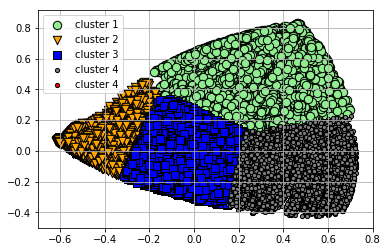

In [133]:
brc.predict(df_vivienda_copy)
plt.scatter(df_vivienda_copy[y_km==0,0],
          df_vivienda_copy[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_vivienda_copy[y_km==1,0],
          df_vivienda_copy[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_vivienda_copy[y_km==2,0],
          df_vivienda_copy[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(df_vivienda_copy[y_km==3,0],
          df_vivienda_copy[y_km==3,1],
          s=70,
          c='grey',
          edgecolor='black',
          marker='.',
          label='cluster 4')
plt.scatter(df_vivienda_copy[y_km==4,0],
          df_vivienda_copy[y_km==4,1],
          s=70,
          c='red',
          edgecolor='black',
          marker='.',
          label='cluster 4')

plt.legend()
plt.grid()
plt.show()

In [134]:
df_Vivienda['Cluster_birch']=brc.fit_predict(df_vivienda_copy)

In [135]:
df_Vivienda.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun,Cluster_km,Cluster_birch
0,5,2,1,1,1,1,1,4,1,1,1,1,1,0
1,1,3,1,1,1,1,1,7,1,1,1,1,1,0
2,3,3,1,1,1,1,1,8,1,1,1,1,1,0
3,4,3,1,1,1,1,1,5,1,1,1,1,1,0
4,5,3,1,1,1,1,1,6,1,1,1,1,1,0


In [136]:
path='C:/Users/alejandro/Desktop/ProyectoFinal Delfin/Limpiados/viviendas_2015_clusters.csv'

df_Vivienda.to_csv(path_or_buf=path,index=True, encoding='utf-8')

In [118]:
np.unique(df_Vivienda.Cluster)

array([0, 1, 2, 3])